# Credit Card Fraud Detection
<hr>

<i>Features</i> : 30 <br>
<i>Target</i>  : 0 or 1<br>
(0 stands for genuine transaction and 1 stands for fraud transaction)<br>
<i>Main problem</i> : Number of frauds is very very less than genuine transactions<br>
<i>Purpose</i> : To train different models using different algorithms to find the future fraud transaction <br>
<i>Algorithms used</i> :<ul><li>Forest Classifier <li>Logistic Regression <li>SVM <li>KNN


In [1]:
#importing useful libraries
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing data from a csv file
data=pd.read_csv("creditcard.csv")

In [6]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
print(data.isnull())
print(data.isnull().sum().max())  #to see whether there is any null value in dataset

         Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24

In [10]:
print('No Frauds:', round(data['Class'].value_counts()[0]/len(data) * 100,3), '% of the dataset')
print('Frauds:', round(data['Class'].value_counts()[1]/len(data) * 100,3), '% of the dataset')

No Frauds: 99.827 % of the dataset
Frauds: 0.173 % of the dataset


Text(0, 0.5, 'Count')

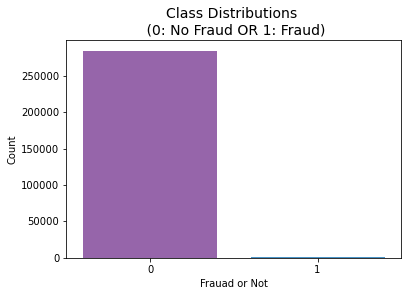

In [11]:
#visualization no of frauds and genuine transactions
colors_p = ["#9b59b6", "#3498db"]
sns.countplot('Class', data=data, palette=colors_p)
plt.title('Class Distributions \n (0: No Fraud OR 1: Fraud)', fontsize=14)
plt.xlabel("Frauad or Not")
plt.ylabel("Count")

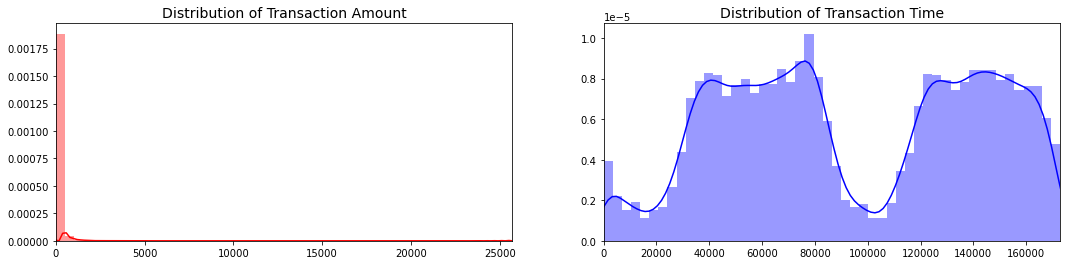

In [12]:
#visualising the distribution of the features
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [13]:
#scaling the time and amount column

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [14]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

print(data.head())

   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

In [15]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#model 
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier()
Rfc.fit(x_train,y_train)
y_predict=Rfc.predict(x_test)


#calculating accuracy etc.
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix


n_errors = (y_predict!= y_test).sum() 
print("The model used is Random Forest Classifier") 
  
acc = accuracy_score(y_test, y_predict) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_predict) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_predict) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_predict) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_predict) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest Classifier
The accuracy is 0.9994908886626171
The precision is 0.9186046511627907
The recall is 0.7821782178217822
The F1-Score is 0.8449197860962566
The Matthews correlation coefficient is0.847406017294963


In [18]:
#Second model
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=5000)
lr.fit(x_train,y_train)
y_predict_logistic=lr.predict(x_test)


In [19]:
#calculating accuracy etc of Logistic Regression
n_errors = (y_predict_logistic!= y_test).sum() 
print("The model used is logistic regression") 
  
acc = accuracy_score(y_test, y_predict_logistic) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_predict_logistic) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_predict_logistic) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_predict_logistic) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_predict_logistic) 
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is logistic regression
The accuracy is 0.9991924440855307
The precision is 0.8767123287671232
The recall is 0.6336633663366337
The F1-Score is 0.7356321839080459
The Matthews correlation coefficient is 0.7449763042763461


In [20]:
#Third model  
#SVM
from sklearn.svm import SVC
svm=SVC(kernel="rbf",random_state=0)
svm.fit(x_train,y_train)
y_predict_SVM=svm.predict(x_test)

In [21]:
#calculating accuracy etc of SVM
n_errors = (y_predict_SVM!= y_test).sum() 
print("The model used is SVM") 
  
acc = accuracy_score(y_test, y_predict_SVM) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_predict_SVM) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_predict_SVM) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_predict_SVM) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_predict_SVM) 
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is SVM
The accuracy is 0.999420666409185
The precision is 0.925
The recall is 0.7326732673267327
The F1-Score is 0.8176795580110497
The Matthews correlation coefficient is 0.8229686751059042


In [22]:
#fourth model 
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)           #we randomly take n_neighbors value=5
knn.fit(x_train,y_train)
y_predict_knn=knn.predict(x_test)

In [23]:
#calculating accuracy etc of KNN
n_errors = (y_predict_knn!= y_test).sum() 
print("The model used is K nearest neighbours") 
  
acc = accuracy_score(y_test, y_predict_knn) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_predict_knn) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_predict_knn) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_predict_knn) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_predict_knn) 
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is K nearest neighbours
The accuracy is 0.9995435553526912
The precision is 0.9310344827586207
The recall is 0.801980198019802
The F1-Score is 0.8617021276595743
The Matthews correlation coefficient is 0.8638813562822949
